# Data analysis on the Flexport datasets. 

### Author: Haoyuan(Michael) Huang

### In my opinion, the key successful indicator for the Flexport is provide fast, on-time deliveries at a lower cost. Therefore, my analysis will mainly focus on this two aspects. 

### The overall analytical strategy is I will use data visulization on each datasets to understand the business background and get some business insights. Then, I will focus on shipment dataset. 

In [338]:
# Import required libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split


In [339]:
# Import dataset
consign = pd.read_csv('C:/Users/vhao/Desktop/flexport_data_analytics_internship_assignment/consignees.csv')
consign.head()


,consignee_company_id,consignee_market_segment,consignee_created_at
0,566300,Emerging,2016-06-15 23:06:31.605727
1,612365,Enterprise,2017-03-27 20:37:24.758263
2,719753,Enterprise,2018-12-07 17:01:26.683009
3,547503,Mid-Market,2015-06-09 01:15:05.494961
4,678526,Mid-Market,2018-05-10 13:25:57.877605


In [340]:
containers = pd.read_csv('C:/Users/vhao/Desktop/flexport_data_analytics_internship_assignment/containers.csv')
containers.head(10)

,shipment_id,container_id,container_type,container_size,volume_cbm,weight_kg,container_utilization
0,551258,195846,Dry,40 ft HC,65.590000,9155.6200,0.8642
1,611620,228371,Dry,40 ft,34.800000,5774.0000,0.5179
2,569644,199211,Dry,40 ft,51.572000,6017.9200,0.7674
3,600001,229944,Dry,40 ft HC,63.828000,7270.6400,0.8409
4,561978,203206,Dry,40 ft HC,2345.249227,7319.3384,30.8992
5,606938,230446,Dry,40 ft,44.160000,6812.0000,0.6571
6,226218,61870,Dry,20 ft,8.293000,2041.5000,0.2528
7,457337,134847,Dry,40 ft HC,65.680000,4570.4000,0.8653
8,118703,44960,Dry,40 ft,39.090000,3009.6000,0.5817
9,373840,97938,Dry,40 ft HC,60.000000,5041.8000,0.7905


In [341]:
bookings = pd.read_csv('C:/Users/vhao/Desktop/flexport_data_analytics_internship_assignment/po_bookings.csv')
bookings.head()

,purchase_order_id,shipment_id,container_id,product_id,consignee_company_id,supplier_company_id,purchase_order_created_date,purchase_order_requested_cargo_ready_date,purchase_order_requested_delivery_date,booking_created_date,booking_cargo_ready_date,purchase_order_sku_count,purchase_order_sku_price,booking_sku_count,shipped_sku_count,shipped_sku_price
0,42200,559601,201144.0,3107426,683679,748415,2019-07-16 16:23:07.832878,2019-08-17,NaN,2019-06-19 11:00:50.95693,2019-08-17,410,NaN,307,205.0,24.66
1,4113,108567,NaN,1074767,546609,631676,2017-10-19 19:36:09.125558,2017-08-28,2017-09-22,2017-08-26 02:09:49.899587,2017-09-15,659,32.80,659,659.0,32.80
2,48494,596848,NaN,3105268,683679,749342,2019-07-12 20:16:23.975147,2019-11-07,2019-11-07,2019-08-14 08:27:05.507885,2019-10-20,154,NaN,154,NaN,NaN
3,48488,586440,222360.0,3107794,683679,748103,2019-08-28 06:26:20.231344,2019-09-14,2019-09-25,2019-07-30 08:23:23.873934,2019-08-30,359,9.53,359,359.0,8.70
4,9995,312425,NaN,1584749,656536,668561,2018-05-31 07:43:52.603414,2018-06-01,2018-07-15,2018-06-15 03:00:10.824455,2018-06-20,158,15.13,158,NaN,NaN


In [342]:
shipments = pd.read_csv('C:/Users/vhao/Desktop/flexport_data_analytics_internship_assignment/shipments.csv')
shipments.head()
                  

,shipment_id,shipment_created_in_system_date,mode,bco,freight_service,freight_type,incoterms,contains_dangerous_goods,supplier_company_id,consignee_company_id,...,actual_arrival_port_arrival_date,scheduled_inland_port_arrival_date,actual_inland_port_arrival_date,scheduled_delivery_date,actual_delivery_date,includes_customs,target_net_revenue,estimated_total_cost,actual_total_cost,actual_total_invoice
0,609050,2019-08-30,Ocean FCL,f,CY to CY,Port to Door,FOB,f,725672,612365,...,NaN,2019-10-05 17:00:00,NaN,2019-10-11 17:00:00,NaN,f,899.24,17984.72,0.00,18374.08
1,580758,2019-07-21,Ocean FCL,f,CY to CY,Port to Port,FOB,f,639363,546609,...,2019-09-10 22:16:35,NaN,NaN,2019-09-19 19:00:00,NaN,f,138.13,1381.28,2124.51,1602.65
2,384675,2018-08-15,Ocean FCL,f,CY to CY,Port to Port,FOB,f,633728,546609,...,2018-10-31 15:00:00,NaN,NaN,2018-11-10 20:00:00,2018-11-05 08:00:00,f,221.96,2219.65,2194.59,2304.82
3,310117,2018-06-13,Air,f,CFS to CFS,Door to Door,EXW,f,636800,543943,...,2018-06-17 05:06:00,NaN,NaN,2018-06-18 07:00:00,2018-06-18 22:00:00,t,1147.65,11601.98,10324.84,11601.98
4,452871,2018-11-26,Air,f,CFS to CFS,Door to Door,EXW,f,643567,543943,...,2018-11-29 20:00:00,NaN,NaN,2018-12-01 05:00:00,2018-12-01 05:00:00,t,461.63,4804.39,2118.56,5609.86


In [343]:
suppliers = pd.read_csv('C:/Users/vhao/Desktop/flexport_data_analytics_internship_assignment/suppliers.csv')
suppliers.head()           

,supplier_company_id,supplier_country_code,supplier_in_east_china,supplier_in_south_china,bookings_feature_first_enabled_at
0,663991,CN,f,t,NaN
1,674105,US,f,f,2018-05-03 16:30:18.969
2,593587,US,f,f,2017-05-10 16:46:10.27
3,646575,US,t,f,NaN
4,693257,CN,t,f,NaN


# Question 1: which country has the largest suppliers? 

In [344]:
# Data Overview 
suppliers.head()

,supplier_company_id,supplier_country_code,supplier_in_east_china,supplier_in_south_china,bookings_feature_first_enabled_at
0,663991,CN,f,t,NaN
1,674105,US,f,f,2018-05-03 16:30:18.969
2,593587,US,f,f,2017-05-10 16:46:10.27
3,646575,US,t,f,NaN
4,693257,CN,t,f,NaN


In [345]:
# Get unique values from country column 
suppliers['supplier_country_code'].unique()

array(['CN', 'US', 'IN', 'HK', 'CA', 'VN', 'TW', 'TH', 'CH', 'PH', 'KR',
       'DE', 'GB', 'AU', 'FR', 'SE', 'MY', 'NZ', 'NL', 'AE', 'MO', 'ID',
       'PT', 'PK', 'SG', 'TR', 'IT', 'BE', 'PE', 'LK', 'MX', 'DK', 'ES',
       'PL', 'CO', 'AT', 'BR', 'SC', 'PR', 'JP', 'HU', 'IE', 'NO'],
      dtype=object)

In [346]:
# Rename Columns 
suppliers.columns = ['id',
             'country',
             'east china',
             'south china',
             'booking date']

In [347]:
# Group by country 
country_group = suppliers.groupby('country')
quantity_ordered = country_group.count()['id']


In [348]:
# Sort countries 
sorted_values = quantity_ordered.sort_values(ascending=False)


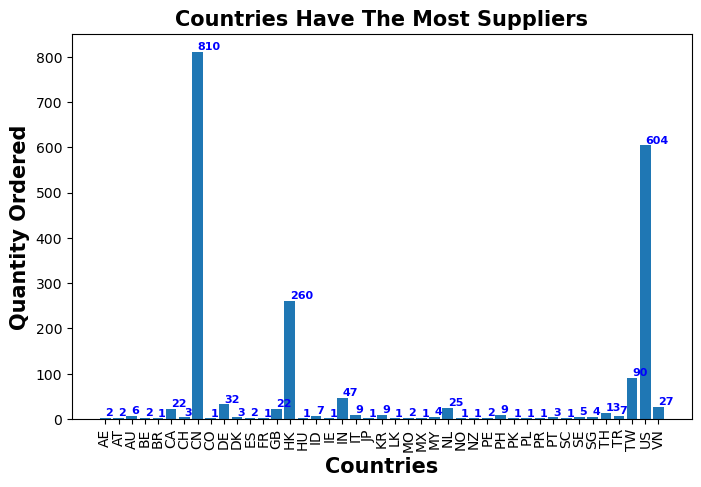

In [349]:
# Create a barplot 
countries = [country for country, df in country_group]

plt.style.use('default')
plt.figure(figsize=(8,5),dpi = 100)
plt.bar(countries, quantity_ordered)
plt.xticks(countries,rotation='vertical')

plt.xlabel('Countries',fontdict = {'fontsize':15,'fontweight':'bold'})
plt.ylabel('Quantity Ordered',fontdict = {'fontsize':15,'fontweight':'bold'})
plt.title('Countries Have The Most Suppliers',fontdict = {'fontsize':15,'fontweight':'bold'})

for index,data in enumerate(quantity_ordered):
    plt.text(x=index , y =data+5 , s=f"{data}" , color = 'b' , fontdict=dict(fontsize=8,fontweight='bold'))

plt.show()

#### From the barplot, there are three main suppliers in the world are China, Hong Kong and United States. 

## Since China is the largest supplier, I would like to know the suppliers distribution in China

In [350]:
# Calculate the supplier's distribution 
df = suppliers.loc[suppliers['country'] == 'CN']
df['east china'].value_counts(normalize = True)
df['south china'].value_counts(normalize = True)


t    0.612346
f    0.387654
Name: south china, dtype: float64

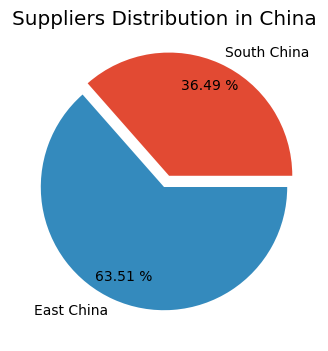

In [351]:
# Create pie chart 
east = df[df['east china'] == 't'].count()[0]
south = df[df['south china'] == 't'].count()[0]

plt.figure(figsize=(6,4))

plt.style.use('ggplot')
labels = ['South China','East China']
explode = [0.1,0]
plt.pie([east,south],labels = labels,autopct = '%.2f %%',pctdistance = 0.8,explode = explode)
plt.title('Suppliers Distribution in China')

plt.show()

# Question 2: What was the best year for sales? How much was earned?

In [352]:
### Data Overview
bookings.head()

,purchase_order_id,shipment_id,container_id,product_id,consignee_company_id,supplier_company_id,purchase_order_created_date,purchase_order_requested_cargo_ready_date,purchase_order_requested_delivery_date,booking_created_date,booking_cargo_ready_date,purchase_order_sku_count,purchase_order_sku_price,booking_sku_count,shipped_sku_count,shipped_sku_price
0,42200,559601,201144.0,3107426,683679,748415,2019-07-16 16:23:07.832878,2019-08-17,NaN,2019-06-19 11:00:50.95693,2019-08-17,410,NaN,307,205.0,24.66
1,4113,108567,NaN,1074767,546609,631676,2017-10-19 19:36:09.125558,2017-08-28,2017-09-22,2017-08-26 02:09:49.899587,2017-09-15,659,32.80,659,659.0,32.80
2,48494,596848,NaN,3105268,683679,749342,2019-07-12 20:16:23.975147,2019-11-07,2019-11-07,2019-08-14 08:27:05.507885,2019-10-20,154,NaN,154,NaN,NaN
3,48488,586440,222360.0,3107794,683679,748103,2019-08-28 06:26:20.231344,2019-09-14,2019-09-25,2019-07-30 08:23:23.873934,2019-08-30,359,9.53,359,359.0,8.70
4,9995,312425,NaN,1584749,656536,668561,2018-05-31 07:43:52.603414,2018-06-01,2018-07-15,2018-06-15 03:00:10.824455,2018-06-20,158,15.13,158,NaN,NaN


In [353]:
# Check missing values 
bookings.isna().sum()

# Calculate the median price for purchase_order_sku_price
median = bookings['purchase_order_sku_price'].median()

# Calculate the median price for shipped_sku_count 
count_median = bookings['shipped_sku_count'].median()

# Calculate the median price for shipped_sku_price  
price_median = bookings['shipped_sku_price'].median()


#### Assumption: There are too many missing values in the dataset, so it's not a good idea to drop the NA values. I decided to use median to fill out the NAs because mean is heavily affected by extreme values. 

In [354]:
# Replace with the median price 
bookings['purchase_order_sku_price'].fillna(median,inplace=True)

# Replace with the median price 
bookings['shipped_sku_count'].fillna(count_median,inplace=True)

# Replace with the median price 
bookings['shipped_sku_price'].fillna(price_median,inplace=True)

In [355]:
# Recheck missing 
bookings.isna().sum()

purchase_order_id                                0
shipment_id                                      0
container_id                                 21529
product_id                                       0
consignee_company_id                             0
supplier_company_id                              0
purchase_order_created_date                      0
purchase_order_requested_cargo_ready_date      339
purchase_order_requested_delivery_date         641
booking_created_date                             0
booking_cargo_ready_date                       215
purchase_order_sku_count                         0
purchase_order_sku_price                         0
booking_sku_count                                0
shipped_sku_count                                0
shipped_sku_price                                0
dtype: int64

In [356]:
# Change variables type to numeric
bookings['purchase_order_sku_count'] = pd.to_numeric(bookings['purchase_order_sku_count'])
bookings['purchase_order_sku_price'] = pd.to_numeric(bookings['purchase_order_sku_price'] )

In [357]:
# Create Sales Column 
bookings['Expected Sales'] = bookings['purchase_order_sku_count']*bookings['purchase_order_sku_price']
bookings.head()

,purchase_order_id,shipment_id,container_id,product_id,consignee_company_id,supplier_company_id,purchase_order_created_date,purchase_order_requested_cargo_ready_date,purchase_order_requested_delivery_date,booking_created_date,booking_cargo_ready_date,purchase_order_sku_count,purchase_order_sku_price,booking_sku_count,shipped_sku_count,shipped_sku_price,Expected Sales
0,42200,559601,201144.0,3107426,683679,748415,2019-07-16 16:23:07.832878,2019-08-17,NaN,2019-06-19 11:00:50.95693,2019-08-17,410,21.675,307,205.0,24.66,8886.75
1,4113,108567,NaN,1074767,546609,631676,2017-10-19 19:36:09.125558,2017-08-28,2017-09-22,2017-08-26 02:09:49.899587,2017-09-15,659,32.800,659,659.0,32.80,21615.20
2,48494,596848,NaN,3105268,683679,749342,2019-07-12 20:16:23.975147,2019-11-07,2019-11-07,2019-08-14 08:27:05.507885,2019-10-20,154,21.675,154,960.0,23.41,3337.95
3,48488,586440,222360.0,3107794,683679,748103,2019-08-28 06:26:20.231344,2019-09-14,2019-09-25,2019-07-30 08:23:23.873934,2019-08-30,359,9.530,359,359.0,8.70,3421.27
4,9995,312425,NaN,1584749,656536,668561,2018-05-31 07:43:52.603414,2018-06-01,2018-07-15,2018-06-15 03:00:10.824455,2018-06-20,158,15.130,158,960.0,23.41,2390.54


In [358]:
# Change variables type to numeric
bookings['shipped_sku_count'] = pd.to_numeric(bookings['shipped_sku_count'])
bookings['shipped_sku_price'] = pd.to_numeric(bookings['shipped_sku_price'])
bookings.head()

,purchase_order_id,shipment_id,container_id,product_id,consignee_company_id,supplier_company_id,purchase_order_created_date,purchase_order_requested_cargo_ready_date,purchase_order_requested_delivery_date,booking_created_date,booking_cargo_ready_date,purchase_order_sku_count,purchase_order_sku_price,booking_sku_count,shipped_sku_count,shipped_sku_price,Expected Sales
0,42200,559601,201144.0,3107426,683679,748415,2019-07-16 16:23:07.832878,2019-08-17,NaN,2019-06-19 11:00:50.95693,2019-08-17,410,21.675,307,205.0,24.66,8886.75
1,4113,108567,NaN,1074767,546609,631676,2017-10-19 19:36:09.125558,2017-08-28,2017-09-22,2017-08-26 02:09:49.899587,2017-09-15,659,32.800,659,659.0,32.80,21615.20
2,48494,596848,NaN,3105268,683679,749342,2019-07-12 20:16:23.975147,2019-11-07,2019-11-07,2019-08-14 08:27:05.507885,2019-10-20,154,21.675,154,960.0,23.41,3337.95
3,48488,586440,222360.0,3107794,683679,748103,2019-08-28 06:26:20.231344,2019-09-14,2019-09-25,2019-07-30 08:23:23.873934,2019-08-30,359,9.530,359,359.0,8.70,3421.27
4,9995,312425,NaN,1584749,656536,668561,2018-05-31 07:43:52.603414,2018-06-01,2018-07-15,2018-06-15 03:00:10.824455,2018-06-20,158,15.130,158,960.0,23.41,2390.54


In [359]:
# Create Sales Column 
bookings['Actual Sales'] = bookings['shipped_sku_count']*bookings['shipped_sku_price']
bookings.head()

,purchase_order_id,shipment_id,container_id,product_id,consignee_company_id,supplier_company_id,purchase_order_created_date,purchase_order_requested_cargo_ready_date,purchase_order_requested_delivery_date,booking_created_date,booking_cargo_ready_date,purchase_order_sku_count,purchase_order_sku_price,booking_sku_count,shipped_sku_count,shipped_sku_price,Expected Sales,Actual Sales
0,42200,559601,201144.0,3107426,683679,748415,2019-07-16 16:23:07.832878,2019-08-17,NaN,2019-06-19 11:00:50.95693,2019-08-17,410,21.675,307,205.0,24.66,8886.75,5055.3
1,4113,108567,NaN,1074767,546609,631676,2017-10-19 19:36:09.125558,2017-08-28,2017-09-22,2017-08-26 02:09:49.899587,2017-09-15,659,32.800,659,659.0,32.80,21615.20,21615.2
2,48494,596848,NaN,3105268,683679,749342,2019-07-12 20:16:23.975147,2019-11-07,2019-11-07,2019-08-14 08:27:05.507885,2019-10-20,154,21.675,154,960.0,23.41,3337.95,22473.6
3,48488,586440,222360.0,3107794,683679,748103,2019-08-28 06:26:20.231344,2019-09-14,2019-09-25,2019-07-30 08:23:23.873934,2019-08-30,359,9.530,359,359.0,8.70,3421.27,3123.3
4,9995,312425,NaN,1584749,656536,668561,2018-05-31 07:43:52.603414,2018-06-01,2018-07-15,2018-06-15 03:00:10.824455,2018-06-20,158,15.130,158,960.0,23.41,2390.54,22473.6


In [360]:
# Create a Year column and change its data type
bookings['year'] = bookings['purchase_order_created_date'].str[0:4]
bookings['year'] = pd.to_numeric(bookings['year'])
bookings.head()

,purchase_order_id,shipment_id,container_id,product_id,consignee_company_id,supplier_company_id,purchase_order_created_date,purchase_order_requested_cargo_ready_date,purchase_order_requested_delivery_date,booking_created_date,booking_cargo_ready_date,purchase_order_sku_count,purchase_order_sku_price,booking_sku_count,shipped_sku_count,shipped_sku_price,Expected Sales,Actual Sales,year
0,42200,559601,201144.0,3107426,683679,748415,2019-07-16 16:23:07.832878,2019-08-17,NaN,2019-06-19 11:00:50.95693,2019-08-17,410,21.675,307,205.0,24.66,8886.75,5055.3,2019
1,4113,108567,NaN,1074767,546609,631676,2017-10-19 19:36:09.125558,2017-08-28,2017-09-22,2017-08-26 02:09:49.899587,2017-09-15,659,32.800,659,659.0,32.80,21615.20,21615.2,2017
2,48494,596848,NaN,3105268,683679,749342,2019-07-12 20:16:23.975147,2019-11-07,2019-11-07,2019-08-14 08:27:05.507885,2019-10-20,154,21.675,154,960.0,23.41,3337.95,22473.6,2019
3,48488,586440,222360.0,3107794,683679,748103,2019-08-28 06:26:20.231344,2019-09-14,2019-09-25,2019-07-30 08:23:23.873934,2019-08-30,359,9.530,359,359.0,8.70,3421.27,3123.3,2019
4,9995,312425,NaN,1584749,656536,668561,2018-05-31 07:43:52.603414,2018-06-01,2018-07-15,2018-06-15 03:00:10.824455,2018-06-20,158,15.130,158,960.0,23.41,2390.54,22473.6,2018


In [361]:
# Group by the year
result = bookings.groupby(by = 'year').sum()['Actual Sales']
result

year
2017    2.489667e+06
2018    3.888316e+08
2019    1.300452e+09
Name: Actual Sales, dtype: float64

In [362]:
# Check on how many years 
bookings.year.unique()

array([2019, 2017, 2018], dtype=int64)

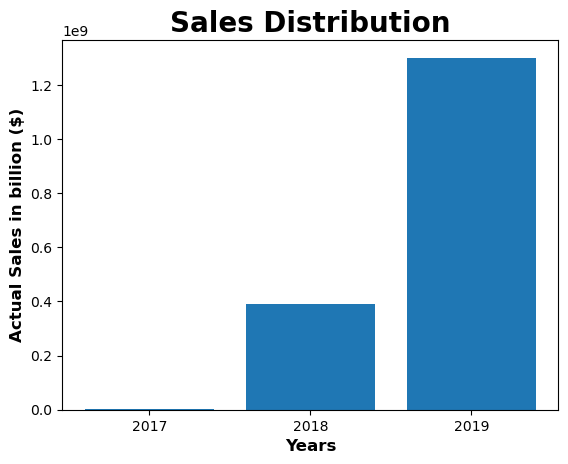

In [364]:
# Create barplot
years = ['2017','2018','2019']

plt.style.use('default')

plt.bar(years, result)

plt.xticks(years)
plt.xlabel('Years',fontdict = {'fontweight':'bold','fontsize':12})
plt.ylabel('Actual Sales in billion ($)',fontdict = {'fontweight':'bold','fontsize':12})
plt.title('Sales Distribution', fontdict = {'fontweight':'bold','fontsize': 20})
plt.show()

# After I observed the chart, my hypothesis is: The more expected sales will lead to more actual sales 

<ipython-input-365-66039bd18125>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(years,size = 8)


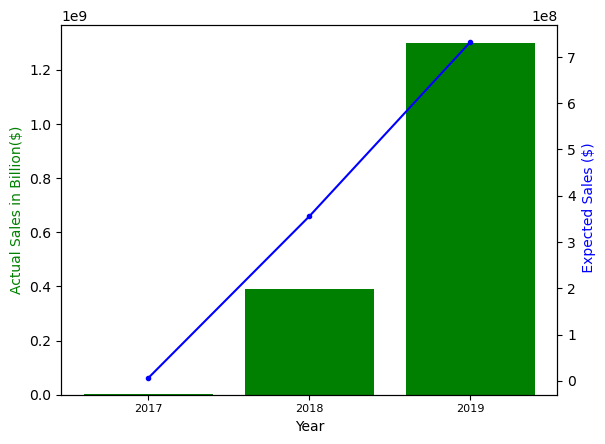

In [365]:
# Update the chart 
prices = bookings.groupby('year').sum()['Expected Sales']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(years,result, color = 'g')
ax2.plot(years, prices , 'b-', marker='.')

ax1.set_xlabel('Year')
ax1.set_ylabel('Actual Sales in Billion($)', color='g')
ax2.set_ylabel(' Expected Sales ($)', color='b')
ax1.set_xticklabels(years,size = 8)

plt.show()

#### The blue line is expected sales, the green bar is the actual sales. 

# Question 3: what is the proportion of shipment? For Ocean shipments, what are the factors will affect the utilities of containers 

In [366]:
# Data Overview
shipments.head()

,shipment_id,shipment_created_in_system_date,mode,bco,freight_service,freight_type,incoterms,contains_dangerous_goods,supplier_company_id,consignee_company_id,...,actual_arrival_port_arrival_date,scheduled_inland_port_arrival_date,actual_inland_port_arrival_date,scheduled_delivery_date,actual_delivery_date,includes_customs,target_net_revenue,estimated_total_cost,actual_total_cost,actual_total_invoice
0,609050,2019-08-30,Ocean FCL,f,CY to CY,Port to Door,FOB,f,725672,612365,...,NaN,2019-10-05 17:00:00,NaN,2019-10-11 17:00:00,NaN,f,899.24,17984.72,0.00,18374.08
1,580758,2019-07-21,Ocean FCL,f,CY to CY,Port to Port,FOB,f,639363,546609,...,2019-09-10 22:16:35,NaN,NaN,2019-09-19 19:00:00,NaN,f,138.13,1381.28,2124.51,1602.65
2,384675,2018-08-15,Ocean FCL,f,CY to CY,Port to Port,FOB,f,633728,546609,...,2018-10-31 15:00:00,NaN,NaN,2018-11-10 20:00:00,2018-11-05 08:00:00,f,221.96,2219.65,2194.59,2304.82
3,310117,2018-06-13,Air,f,CFS to CFS,Door to Door,EXW,f,636800,543943,...,2018-06-17 05:06:00,NaN,NaN,2018-06-18 07:00:00,2018-06-18 22:00:00,t,1147.65,11601.98,10324.84,11601.98
4,452871,2018-11-26,Air,f,CFS to CFS,Door to Door,EXW,f,643567,543943,...,2018-11-29 20:00:00,NaN,NaN,2018-12-01 05:00:00,2018-12-01 05:00:00,t,461.63,4804.39,2118.56,5609.86


In [367]:
# Check how many transportation methods
shipments['mode'].unique()

array(['Ocean FCL', 'Air'], dtype=object)

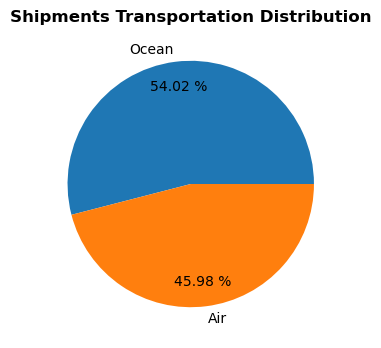

In [368]:
# Create pie chart 
ocean = shipments[shipments['mode'] == 'Ocean FCL'].count()[0]
air = shipments[shipments['mode'] == 'Air'].count()[0]

plt.figure(figsize=(6,4))

plt.style.use('default')
plt.title('Shipments Transportation Distribution',fontdict = {'fontweight':'bold'})
labels = ['Ocean','Air']
plt.pie([ocean,air],labels = labels,autopct = '%.2f %%',pctdistance = 0.8)

plt.show()

In [369]:
# Data Overview
containers.head()

,shipment_id,container_id,container_type,container_size,volume_cbm,weight_kg,container_utilization
0,551258,195846,Dry,40 ft HC,65.590000,9155.6200,0.8642
1,611620,228371,Dry,40 ft,34.800000,5774.0000,0.5179
2,569644,199211,Dry,40 ft,51.572000,6017.9200,0.7674
3,600001,229944,Dry,40 ft HC,63.828000,7270.6400,0.8409
4,561978,203206,Dry,40 ft HC,2345.249227,7319.3384,30.8992


#### By observing the data, I realized some data inconsistency. Container utilization should be between 0 to 1 and there are some records higher than 1, so I will do some further analysis.

In [370]:
# Check records have container utilization higher than 1
containers.loc[containers['container_utilization'] > 1]

,shipment_id,container_id,container_type,container_size,volume_cbm,weight_kg,container_utilization
4,561978,203206,Dry,40 ft HC,2345.249227,7319.338400,30.8992
286,515972,161863,Dry,40 ft,69.732000,9114.300000,1.0377
379,423732,108170,Dry,20 ft,40.000000,2531.000000,1.2195
886,567898,119249,Dry,40 ft HC,2278.151297,15502.513055,30.0152
998,581212,209611,Dry,20 ft,52.069000,1493.900000,1.5875
1333,585397,211181,Dry,40 ft,1279.804728,18139.613360,19.0447
1930,585397,211178,Dry,40 ft,1279.804728,18139.613360,19.0447
1990,541424,184643,Dry,40 ft,1959.330185,13926.099524,29.1567
2242,541424,184644,Dry,40 ft,1973.032289,13459.469654,29.3606
2552,541424,184642,Dry,40 ft HC,2212.077493,16841.907889,29.1446


#### After check the data, I found some records have some abnormal utilizations. My assumption is the containers are able to overweight a little bit in case of emergency. Thus, I decided to keep the record less than 2. 

In [371]:
# Drop abnormal records
containers= containers.loc[containers['container_utilization'] <= 2]
containers.head()

,shipment_id,container_id,container_type,container_size,volume_cbm,weight_kg,container_utilization
0,551258,195846,Dry,40 ft HC,65.590,9155.62,0.8642
1,611620,228371,Dry,40 ft,34.800,5774.00,0.5179
2,569644,199211,Dry,40 ft,51.572,6017.92,0.7674
3,600001,229944,Dry,40 ft HC,63.828,7270.64,0.8409
5,606938,230446,Dry,40 ft,44.160,6812.00,0.6571


In [372]:
# Group by Container Type
result = containers.groupby('container_type').mean()
result.head()

,shipment_id,container_id,volume_cbm,weight_kg,container_utilization
container_type,,,,,
Dry,416794.092167,133013.922789,47.936713,7326.57982,0.707353
Flat Rack,566192.000000,205091.000000,53.447000,6117.41000,0.795300
Open,410549.000000,108738.000000,45.800000,12612.00000,0.681500
Ventilated,210693.520000,63177.520000,42.988520,6114.96688,0.570676


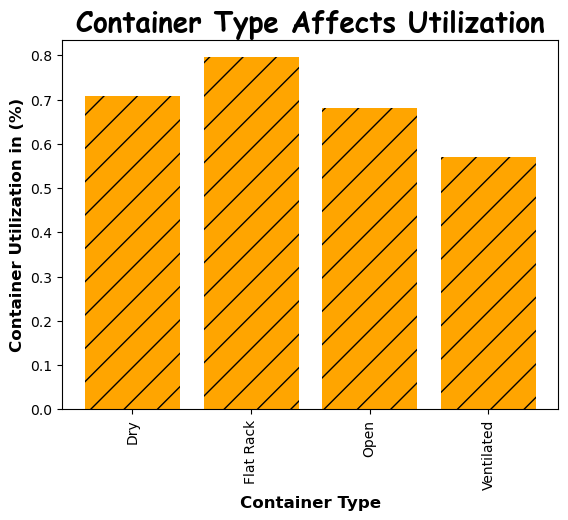

In [373]:
# Create barplot
types = [types for types, df in containers.groupby('container_type')]

bars = plt.bar(types, result['container_utilization'],color = 'orange')

plt.style.use('ggplot')

plt.xticks(types,rotation='vertical')
plt.xlabel('Container Type',fontdict = {'fontweight':'bold','fontsize':12})
plt.ylabel('Container Utilization in (%)',fontdict = {'fontweight':'bold','fontsize':12})
plt.title('Container Type Affects Utilization', fontdict = {'fontweight':'bold','fontsize': 20,'fontname': 'Comic Sans MS'})


patterns = ['/','/','/','/']
for bar in bars:
    bar.set_hatch(patterns.pop(0))
plt.show()

#### Flat Rack have the highest container utilization, the Ventilated have the smallest container utilization

# Hypothesis: The larger the container size will have a higher utilization rate 

In [374]:
# Check Container Sizes 
containers['container_size'].unique()

array(['40 ft HC', '40 ft', '20 ft', '45 ft HC'], dtype=object)

In [375]:
# Group by container size
containers.groupby('container_size').mean()

,shipment_id,container_id,volume_cbm,weight_kg,container_utilization
container_size,,,,,
20 ft,385042.844417,122614.222083,20.406574,4136.499754,0.622153
40 ft,415430.686226,130409.599702,43.277200,6008.673503,0.644004
40 ft HC,428637.544939,139328.077661,61.019277,7939.068148,0.803942
45 ft HC,403770.251748,123615.562937,51.209031,20339.112545,0.594760


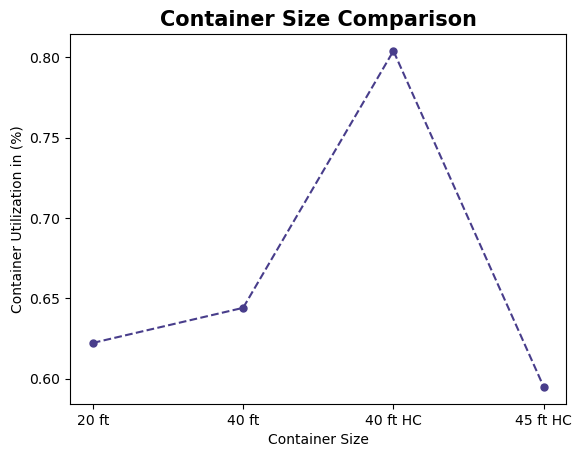

In [420]:
# Create lineplot
sizes  = [size for size, df in containers.groupby('container_size')]

plt.style.use('default')
plt.plot(sizes,containers.groupby('container_size').mean()['container_utilization'],linestyle = '--',marker= '.',markersize = 10,color = 'darkslateblue')

plt.title('Container Size Comparison',fontdict = {'fontweight':'bold','fontsize':15})
plt.xticks(sizes)
plt.xlabel('Container Size')
plt.ylabel('Container Utilization in (%)')


plt.show()

#### From the graph, we can see that 40 ft HC has the largest utilization rate, but the 45 ft HC has the lowest utilization rate. 

# Hypothesis: 40 ft HC or flat rack container type will have the highest utilization rate

In [377]:
# Group by size and type
df3 = containers.groupby(["container_size", "container_type"]).agg({'container_utilization': 'mean'})
df3 = df3.reset_index()

# Round to three decimals 
df3['container_utilization'] = round(df3['container_utilization'], 3)
df3

,container_size,container_type,container_utilization
0,20 ft,Dry,0.624
1,40 ft,Dry,0.644
2,40 ft,Flat Rack,0.795
3,40 ft,Open,0.682
4,40 ft,Ventilated,0.468
5,40 ft HC,Dry,0.806
6,40 ft HC,Ventilated,0.580
7,45 ft HC,Dry,0.595


In [378]:
# Make a list
df = list(df3['container_utilization'])
df

[0.624, 0.644, 0.795, 0.682, 0.468, 0.806, 0.58, 0.595]

In [379]:
# Assign values to each type
Dry = df[0],df[1],df[5],df[7]
FlatRack = 0,df[2],0,0
Open = 0,df[3],0,0
Ventilated = 0,df[4],df[6],0

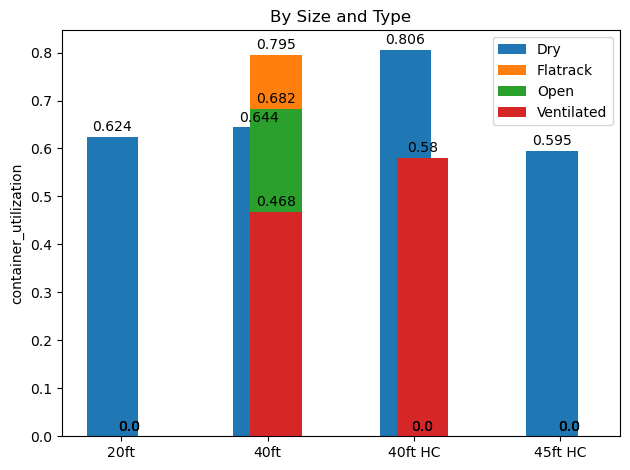

In [380]:
labels = ['20ft', '40ft','40ft HC','45ft HC']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/6, Dry, width, label='Dry')
rects2 = ax.bar(x + width/6, FlatRack, width, label='Flatrack')
rects3 = ax.bar(x + width/6, Open, width, label='Open')
rects4 = ax.bar(x + width/6, Ventilated, width, label='Ventilated')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('container_utilization')
ax.set_title('By Size and Type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 2 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

# Question 4: How many companies that pay Flexport to have their Products moved from Suppliers to final destination? What's their market size/potential

In [381]:
# Data Overview
consign.head()

,consignee_company_id,consignee_market_segment,consignee_created_at
0,566300,Emerging,2016-06-15 23:06:31.605727
1,612365,Enterprise,2017-03-27 20:37:24.758263
2,719753,Enterprise,2018-12-07 17:01:26.683009
3,547503,Mid-Market,2015-06-09 01:15:05.494961
4,678526,Mid-Market,2018-05-10 13:25:57.877605


In [382]:
# How many consignee companies?
consign.count()['consignee_company_id']

34

#### There are 34 companies that pay Flexport to have their Products moved from Suppliers to final destination

In [383]:
# Group by Market Segment
consign.groupby('consignee_market_segment').count()

,consignee_company_id,consignee_created_at
consignee_market_segment,,
Emerging,9,9
Enterprise,5,5
Mid-Market,14,14
SMB,6,6


In [384]:
consign.groupby('consignee_market_segment').count()['consignee_company_id']

consignee_market_segment
Emerging       9
Enterprise     5
Mid-Market    14
SMB            6
Name: consignee_company_id, dtype: int64

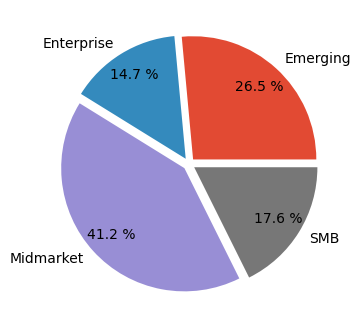

In [385]:
# Create Pie Chart
Emerging = 9
Enterprise = 5
Midmarket = 14
SMB = 6

plt.figure(figsize=(6,4))

plt.style.use('ggplot')
labels = ['Emerging', 'Enterprise','Midmarket','SMB']
explode = [0.05,0.05,0.05,0.05]

plt.pie([Emerging,Enterprise,Midmarket,SMB],labels = labels,autopct = '%.1f %%',pctdistance = 0.8,explode = explode)


plt.show()

#### Consignees are mainly mid-market firms and emerging firms. In my perspective, the growth potential is so huge in the future. 

# The main analysis is focusing on delivery and cost. Thus, my main focus will be on the shippment dataset 

In [386]:
# Data Overview
shipments.head()

,shipment_id,shipment_created_in_system_date,mode,bco,freight_service,freight_type,incoterms,contains_dangerous_goods,supplier_company_id,consignee_company_id,...,actual_arrival_port_arrival_date,scheduled_inland_port_arrival_date,actual_inland_port_arrival_date,scheduled_delivery_date,actual_delivery_date,includes_customs,target_net_revenue,estimated_total_cost,actual_total_cost,actual_total_invoice
0,609050,2019-08-30,Ocean FCL,f,CY to CY,Port to Door,FOB,f,725672,612365,...,NaN,2019-10-05 17:00:00,NaN,2019-10-11 17:00:00,NaN,f,899.24,17984.72,0.00,18374.08
1,580758,2019-07-21,Ocean FCL,f,CY to CY,Port to Port,FOB,f,639363,546609,...,2019-09-10 22:16:35,NaN,NaN,2019-09-19 19:00:00,NaN,f,138.13,1381.28,2124.51,1602.65
2,384675,2018-08-15,Ocean FCL,f,CY to CY,Port to Port,FOB,f,633728,546609,...,2018-10-31 15:00:00,NaN,NaN,2018-11-10 20:00:00,2018-11-05 08:00:00,f,221.96,2219.65,2194.59,2304.82
3,310117,2018-06-13,Air,f,CFS to CFS,Door to Door,EXW,f,636800,543943,...,2018-06-17 05:06:00,NaN,NaN,2018-06-18 07:00:00,2018-06-18 22:00:00,t,1147.65,11601.98,10324.84,11601.98
4,452871,2018-11-26,Air,f,CFS to CFS,Door to Door,EXW,f,643567,543943,...,2018-11-29 20:00:00,NaN,NaN,2018-12-01 05:00:00,2018-12-01 05:00:00,t,461.63,4804.39,2118.56,5609.86


### By observing the data, I find some error in the data. The Actual Total Cost is zero, that'd be an data error or data inaccuracy. For these records, there are also a lot of missing data for other columns as well. Therefore, I decided to do an outlier analysis.                                     

In [387]:
# Create a Column Estimated Cost Error 
shipments['estimated_cost_error'] = shipments['estimated_total_cost'] / shipments['actual_total_cost']
shipments.head()

,shipment_id,shipment_created_in_system_date,mode,bco,freight_service,freight_type,incoterms,contains_dangerous_goods,supplier_company_id,consignee_company_id,...,scheduled_inland_port_arrival_date,actual_inland_port_arrival_date,scheduled_delivery_date,actual_delivery_date,includes_customs,target_net_revenue,estimated_total_cost,actual_total_cost,actual_total_invoice,estimated_cost_error
0,609050,2019-08-30,Ocean FCL,f,CY to CY,Port to Door,FOB,f,725672,612365,...,2019-10-05 17:00:00,NaN,2019-10-11 17:00:00,NaN,f,899.24,17984.72,0.00,18374.08,inf
1,580758,2019-07-21,Ocean FCL,f,CY to CY,Port to Port,FOB,f,639363,546609,...,NaN,NaN,2019-09-19 19:00:00,NaN,f,138.13,1381.28,2124.51,1602.65,0.650164
2,384675,2018-08-15,Ocean FCL,f,CY to CY,Port to Port,FOB,f,633728,546609,...,NaN,NaN,2018-11-10 20:00:00,2018-11-05 08:00:00,f,221.96,2219.65,2194.59,2304.82,1.011419
3,310117,2018-06-13,Air,f,CFS to CFS,Door to Door,EXW,f,636800,543943,...,NaN,NaN,2018-06-18 07:00:00,2018-06-18 22:00:00,t,1147.65,11601.98,10324.84,11601.98,1.123696
4,452871,2018-11-26,Air,f,CFS to CFS,Door to Door,EXW,f,643567,543943,...,NaN,NaN,2018-12-01 05:00:00,2018-12-01 05:00:00,t,461.63,4804.39,2118.56,5609.86,2.267762


### I will set the cost error margin from 0.8 to 1.25. I assume a successful firm will able be accurately estimate its cost, so I will keep the accuracy above 80 percent. 

In [388]:
# Drop Outliers
shipments = shipments.loc[(shipments['estimated_cost_error'] >= 0.8) & (shipments['estimated_cost_error'] <= 1.25)]
shipments.head()

,shipment_id,shipment_created_in_system_date,mode,bco,freight_service,freight_type,incoterms,contains_dangerous_goods,supplier_company_id,consignee_company_id,...,scheduled_inland_port_arrival_date,actual_inland_port_arrival_date,scheduled_delivery_date,actual_delivery_date,includes_customs,target_net_revenue,estimated_total_cost,actual_total_cost,actual_total_invoice,estimated_cost_error
2,384675,2018-08-15,Ocean FCL,f,CY to CY,Port to Port,FOB,f,633728,546609,...,NaN,NaN,2018-11-10 20:00:00,2018-11-05 08:00:00,f,221.96,2219.65,2194.59,2304.82,1.011419
3,310117,2018-06-13,Air,f,CFS to CFS,Door to Door,EXW,f,636800,543943,...,NaN,NaN,2018-06-18 07:00:00,2018-06-18 22:00:00,t,1147.65,11601.98,10324.84,11601.98,1.123696
6,312662,2018-06-15,Ocean FCL,f,CY to CY,Port to Port,FOB,f,749699,612365,...,2018-08-18 16:00:00,2018-08-19 04:00:00,2018-08-22 16:00:00,2018-08-22 04:00:00,f,167.95,3359.02,3406.36,3476.86,0.986102
7,416056,2018-09-17,Air,f,CFS to CFS,Port to Door,FCA,f,680817,654884,...,NaN,NaN,2018-09-28 19:00:00,2018-09-28 22:00:00,t,520.75,10651.50,9322.91,11366.10,1.142508
8,297747,2018-06-01,Ocean FCL,f,CY to Door,Port to Door,FOB,f,598234,543943,...,NaN,NaN,2018-07-06 07:00:00,2018-07-06 19:07:30.490919,t,270.99,2835.92,2272.82,2835.91,1.247754


#### After drop the outlier, we can see that the data is pretty accurate. The target net revenue + the estimated total cost is close to the actual total invoice 

# Hypothesis: The Flexport works in a transportation industry, there might be a seasonality 

In [390]:
# Create year and month column 
shipments['Year'] = shipments['actual_delivery_date'].str[0:4]
shipments['Month'] = shipments['actual_delivery_date'].str[5:7]
shipments.head()

,shipment_id,shipment_created_in_system_date,mode,bco,freight_service,freight_type,incoterms,contains_dangerous_goods,supplier_company_id,consignee_company_id,...,scheduled_delivery_date,actual_delivery_date,includes_customs,target_net_revenue,estimated_total_cost,actual_total_cost,actual_total_invoice,estimated_cost_error,Year,Month
2,384675,2018-08-15,Ocean FCL,f,CY to CY,Port to Port,FOB,f,633728,546609,...,2018-11-10 20:00:00,2018-11-05 08:00:00,f,221.96,2219.65,2194.59,2304.82,1.011419,2018,11
3,310117,2018-06-13,Air,f,CFS to CFS,Door to Door,EXW,f,636800,543943,...,2018-06-18 07:00:00,2018-06-18 22:00:00,t,1147.65,11601.98,10324.84,11601.98,1.123696,2018,06
6,312662,2018-06-15,Ocean FCL,f,CY to CY,Port to Port,FOB,f,749699,612365,...,2018-08-22 16:00:00,2018-08-22 04:00:00,f,167.95,3359.02,3406.36,3476.86,0.986102,2018,08
7,416056,2018-09-17,Air,f,CFS to CFS,Port to Door,FCA,f,680817,654884,...,2018-09-28 19:00:00,2018-09-28 22:00:00,t,520.75,10651.50,9322.91,11366.10,1.142508,2018,09
8,297747,2018-06-01,Ocean FCL,f,CY to Door,Port to Door,FOB,f,598234,543943,...,2018-07-06 07:00:00,2018-07-06 19:07:30.490919,t,270.99,2835.92,2272.82,2835.91,1.247754,2018,07


In [391]:
### Check year's unique value 
shipments['Year'].unique()

### drop NA value
shipments.dropna(subset = ['Year'],inplace=True)

### Recheck year's unique value
shipments['Year'].unique()

array(['2018', '2019', '2017', '2016'], dtype=object)

In [392]:
# Separate to different years 
shipments_2016 = shipments.loc[shipments['Year'] == '2016']
shipments_2017 = shipments.loc[shipments['Year'] == '2017']
shipments_2018 = shipments.loc[shipments['Year'] == '2018']
shipments_2019 = shipments.loc[shipments['Year'] == '2019']


shipments_2018.head()

,shipment_id,shipment_created_in_system_date,mode,bco,freight_service,freight_type,incoterms,contains_dangerous_goods,supplier_company_id,consignee_company_id,...,scheduled_delivery_date,actual_delivery_date,includes_customs,target_net_revenue,estimated_total_cost,actual_total_cost,actual_total_invoice,estimated_cost_error,Year,Month
2,384675,2018-08-15,Ocean FCL,f,CY to CY,Port to Port,FOB,f,633728,546609,...,2018-11-10 20:00:00,2018-11-05 08:00:00,f,221.96,2219.65,2194.59,2304.82,1.011419,2018,11
3,310117,2018-06-13,Air,f,CFS to CFS,Door to Door,EXW,f,636800,543943,...,2018-06-18 07:00:00,2018-06-18 22:00:00,t,1147.65,11601.98,10324.84,11601.98,1.123696,2018,06
6,312662,2018-06-15,Ocean FCL,f,CY to CY,Port to Port,FOB,f,749699,612365,...,2018-08-22 16:00:00,2018-08-22 04:00:00,f,167.95,3359.02,3406.36,3476.86,0.986102,2018,08
7,416056,2018-09-17,Air,f,CFS to CFS,Port to Door,FCA,f,680817,654884,...,2018-09-28 19:00:00,2018-09-28 22:00:00,t,520.75,10651.50,9322.91,11366.10,1.142508,2018,09
8,297747,2018-06-01,Ocean FCL,f,CY to Door,Port to Door,FOB,f,598234,543943,...,2018-07-06 07:00:00,2018-07-06 19:07:30.490919,t,270.99,2835.92,2272.82,2835.91,1.247754,2018,07


### Revenue Distribution in 2016

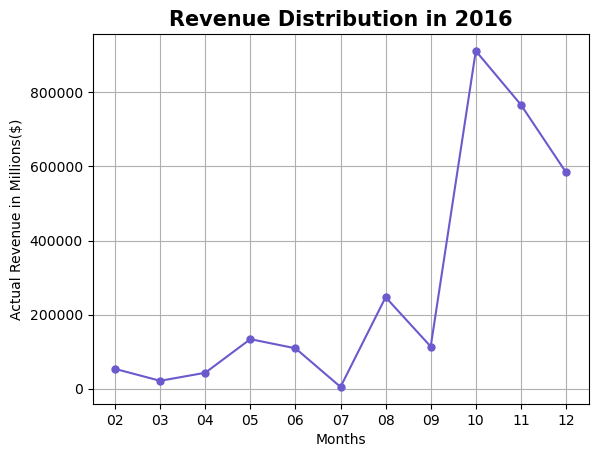

In [393]:
# Create the chart 
months  = [month for month, df in shipments_2016.groupby('Month')]

plt.style.use('default')
plt.plot(months,shipments_2016.groupby('Month').sum()['actual_total_invoice'],marker= '.',markersize = 10,color='slateblue')

plt.title('Revenue Distribution in 2016',fontdict = {'fontweight':'bold','fontsize':15})
plt.xticks(months)
plt.grid()
plt.xlabel('Months')
plt.ylabel('Actual Revenue in Millions($)')


plt.show()

### Revenue Distribution in 2017

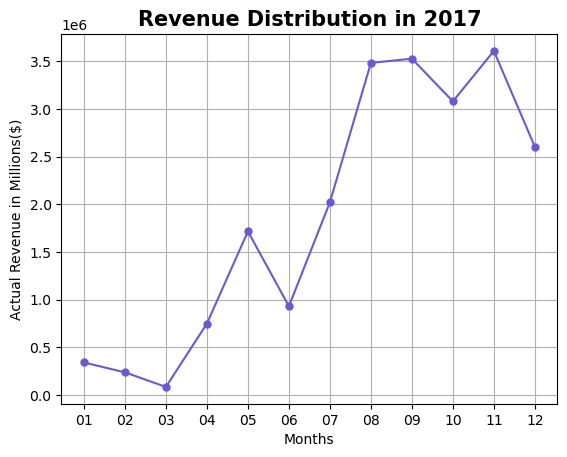

In [394]:
# Create the chart 
months  = [month for month, df in shipments_2017.groupby('Month')]

plt.style.use('default')
plt.plot(months,shipments_2017.groupby('Month').sum()['actual_total_invoice'],marker= '.',markersize = 10,color='slateblue')

plt.title('Revenue Distribution in 2017',fontdict = {'fontweight':'bold','fontsize':15})
plt.xticks(months)
plt.grid()
plt.xlabel('Months')
plt.ylabel('Actual Revenue in Millions($)')


plt.show()

### Revenue Distribution in 2018

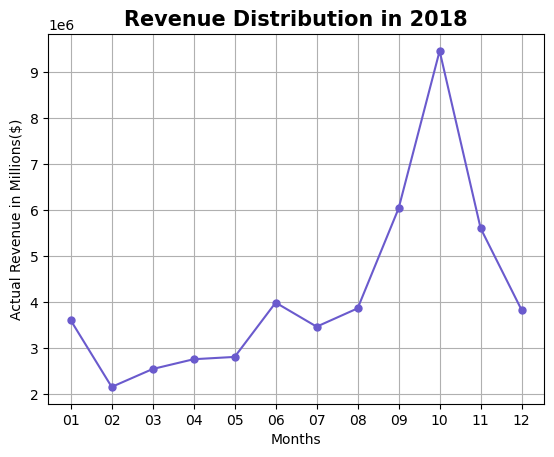

In [395]:
months  = [month for month, df in shipments_2018.groupby('Month')]

plt.style.use('default')
plt.plot(months,shipments_2018.groupby('Month').sum()['actual_total_invoice'],marker= '.',markersize = 10,color='slateblue')

plt.title('Revenue Distribution in 2018',fontdict = {'fontweight':'bold','fontsize':15})
plt.xticks(months)
plt.grid()
plt.xlabel('Months')
plt.ylabel('Actual Revenue in Millions($)')


plt.show()

### Revenue Distribution in 2019

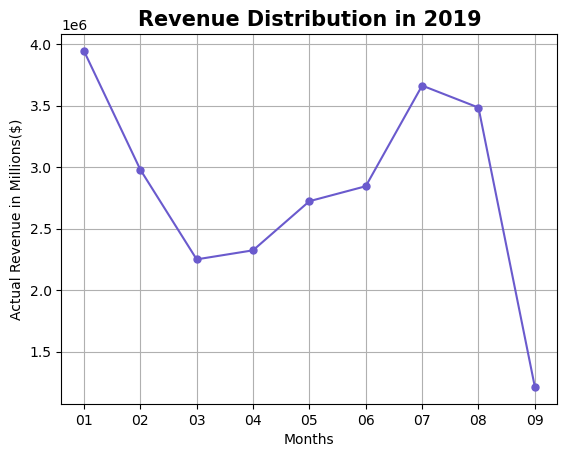

In [399]:
months  = [month for month, df in shipments_2019.groupby('Month')]

plt.style.use('default')
plt.plot(months,shipments_2019.groupby('Month').sum()['actual_total_invoice'],marker= '.',markersize = 10,color='slateblue')

plt.title('Revenue Distribution in 2019',fontdict = {'fontweight':'bold','fontsize':15})
plt.xticks(months)
plt.grid()
plt.xlabel('Months')
plt.ylabel('Actual Revenue in Millions($)')


plt.show()

#### In my opinion there is a seasonality over years. From the graph, we can see that the actual revenue is higher in the second half of the year and lower in the first half. The peak is around October and November. This is an interesting oberservation because December is the last month of the year and December has a lot of holidays including Christmas and New Year. 

# Hypothesis: the different incoterms will have different impact on the  estimate cost and actual cost.

In [400]:
### Data Transform
shipments_2016['estimated_total_cost'] = pd.to_numeric(shipments_2016['estimated_total_cost'])
shipments_2016['actual_total_cost'] = pd.to_numeric(shipments_2016['actual_total_cost'])
shipments_2016['difference'] = shipments_2016['estimated_total_cost']-shipments_2016['actual_total_cost']
shipments_2016.head()

<ipython-input-400-0f12a45d1307>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shipments_2016['estimated_total_cost'] = pd.to_numeric(shipments_2016['estimated_total_cost'])
<ipython-input-400-0f12a45d1307>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shipments_2016['actual_total_cost'] = pd.to_numeric(shipments_2016['actual_total_cost'])
<ipython-input-400-0f12a45d1307>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

,shipment_id,shipment_created_in_system_date,mode,bco,freight_service,freight_type,incoterms,contains_dangerous_goods,supplier_company_id,consignee_company_id,...,actual_delivery_date,includes_customs,target_net_revenue,estimated_total_cost,actual_total_cost,actual_total_invoice,estimated_cost_error,Year,Month,difference
96,48700,2016-10-14,Air,f,CFS to CFS,Port to Door,NaN,f,598641,543943,...,2016-10-20 07:00:00,t,858.79,8690.81,6996.45,8690.81,1.242174,2016,10,1694.36
144,51205,2016-10-31,Air,f,CFS to CFS,Port to Door,FOB,f,606418,552355,...,2016-11-07 08:00:00,t,184.74,1952.42,1799.99,2195.31,1.084684,2016,11,152.43
242,47464,2016-10-07,Air,f,CFS to CFS,Port to Door,NaN,f,598641,543943,...,2016-10-10 23:00:00,t,454.95,4658.01,3957.38,4658.01,1.177044,2016,10,700.63
258,51003,2016-10-28,Air,f,CFS to CFS,Port to Door,NaN,f,598641,543943,...,2016-11-01 07:00:00,t,1427.62,14385.11,11924.34,12991.36,1.206365,2016,11,2460.77
265,48559,2016-10-14,Air,f,CFS to CFS,Port to Door,FOB,f,600208,583732,...,2016-11-03 07:00:00,t,1073.52,10844.38,11391.83,12270.70,0.951944,2016,11,-547.45


In [401]:
shipments_2017['estimated_total_cost'] = pd.to_numeric(shipments_2017['estimated_total_cost'])
shipments_2017['actual_total_cost'] = pd.to_numeric(shipments_2017['actual_total_cost'])
shipments_2017['difference'] = shipments_2017['estimated_total_cost']-shipments_2017['actual_total_cost']
shipments_2017.head()

<ipython-input-401-de02d4bbd3fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shipments_2017['estimated_total_cost'] = pd.to_numeric(shipments_2017['estimated_total_cost'])
<ipython-input-401-de02d4bbd3fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shipments_2017['actual_total_cost'] = pd.to_numeric(shipments_2017['actual_total_cost'])
<ipython-input-401-de02d4bbd3fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

,shipment_id,shipment_created_in_system_date,mode,bco,freight_service,freight_type,incoterms,contains_dangerous_goods,supplier_company_id,consignee_company_id,...,actual_delivery_date,includes_customs,target_net_revenue,estimated_total_cost,actual_total_cost,actual_total_invoice,estimated_cost_error,Year,Month,difference
10,62217,2017-01-12,Ocean FCL,f,CY to CY,Port to Door,FOB,f,628973,543943,...,2017-02-27 08:00:00,t,327.11,3370.93,3293.38,3647.91,1.023547,2017,02,77.55
13,88179,2017-05-31,Ocean FCL,f,CY to CY,Port to Door,FOB,f,609571,552355,...,2017-07-03 19:00:00,t,194.98,2049.80,1964.81,2351.71,1.043256,2017,07,84.99
25,118715,2017-10-04,Air,f,CFS to CFS,Port to Door,FOB,f,600208,583732,...,2017-10-20 18:24:00,t,457.60,4676.55,4566.95,5437.44,1.023999,2017,10,109.60
30,81596,2017-04-28,Air,f,CFS to CFS,Port to Door,FCA,f,598641,543943,...,2017-05-03 16:30:00,t,938.04,9481.05,9245.41,9481.05,1.025487,2017,05,235.64
35,108002,2017-08-24,Air,f,CFS to CFS,Door to Door,FOB,f,598234,543943,...,2017-08-30 07:00:00,t,703.81,7138.92,6957.82,7138.92,1.026028,2017,08,181.10


In [402]:
shipments_2018['estimated_total_cost'] = pd.to_numeric(shipments_2018['estimated_total_cost'])
shipments_2018['actual_total_cost'] = pd.to_numeric(shipments_2018['actual_total_cost'])
shipments_2018['difference'] = shipments_2018['estimated_total_cost']-shipments_2018['actual_total_cost']
shipments_2018.head()

<ipython-input-402-3e5f6829213d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shipments_2018['estimated_total_cost'] = pd.to_numeric(shipments_2018['estimated_total_cost'])
<ipython-input-402-3e5f6829213d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shipments_2018['actual_total_cost'] = pd.to_numeric(shipments_2018['actual_total_cost'])
<ipython-input-402-3e5f6829213d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

,shipment_id,shipment_created_in_system_date,mode,bco,freight_service,freight_type,incoterms,contains_dangerous_goods,supplier_company_id,consignee_company_id,...,actual_delivery_date,includes_customs,target_net_revenue,estimated_total_cost,actual_total_cost,actual_total_invoice,estimated_cost_error,Year,Month,difference
2,384675,2018-08-15,Ocean FCL,f,CY to CY,Port to Port,FOB,f,633728,546609,...,2018-11-05 08:00:00,f,221.96,2219.65,2194.59,2304.82,1.011419,2018,11,25.06
3,310117,2018-06-13,Air,f,CFS to CFS,Door to Door,EXW,f,636800,543943,...,2018-06-18 22:00:00,t,1147.65,11601.98,10324.84,11601.98,1.123696,2018,06,1277.14
6,312662,2018-06-15,Ocean FCL,f,CY to CY,Port to Port,FOB,f,749699,612365,...,2018-08-22 04:00:00,f,167.95,3359.02,3406.36,3476.86,0.986102,2018,08,-47.34
7,416056,2018-09-17,Air,f,CFS to CFS,Port to Door,FCA,f,680817,654884,...,2018-09-28 22:00:00,t,520.75,10651.50,9322.91,11366.10,1.142508,2018,09,1328.59
8,297747,2018-06-01,Ocean FCL,f,CY to Door,Port to Door,FOB,f,598234,543943,...,2018-07-06 19:07:30.490919,t,270.99,2835.92,2272.82,2835.91,1.247754,2018,07,563.10


In [403]:
shipments_2019['estimated_total_cost'] = pd.to_numeric(shipments_2019['estimated_total_cost'])
shipments_2019['actual_total_cost'] = pd.to_numeric(shipments_2019['actual_total_cost'])
shipments_2019['difference'] = shipments_2019['estimated_total_cost']-shipments_2019['actual_total_cost']
shipments_2019.head()

<ipython-input-403-a669e1a8aae6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shipments_2019['estimated_total_cost'] = pd.to_numeric(shipments_2019['estimated_total_cost'])
<ipython-input-403-a669e1a8aae6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shipments_2019['actual_total_cost'] = pd.to_numeric(shipments_2019['actual_total_cost'])
<ipython-input-403-a669e1a8aae6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

,shipment_id,shipment_created_in_system_date,mode,bco,freight_service,freight_type,incoterms,contains_dangerous_goods,supplier_company_id,consignee_company_id,...,actual_delivery_date,includes_customs,target_net_revenue,estimated_total_cost,actual_total_cost,actual_total_invoice,estimated_cost_error,Year,Month,difference
9,494560,2019-02-21,Ocean FCL,f,CY to CY,Port to Door,DAP,f,619714,548913,...,2019-04-25 16:00:00,t,2954.80,29701.21,27600.62,39361.64,1.076107,2019,04,2100.59
15,524364,2019-04-18,Ocean FCL,f,CY to CY,Port to Port,FOB,f,631676,546609,...,2019-06-04 19:00:00,t,203.49,2161.21,1761.12,2265.88,1.227179,2019,06,400.09
19,548893,2019-05-30,Ocean FCL,f,CY to CY,Port to Door,FOB,f,750367,730503,...,2019-07-31 18:30:00,t,1058.45,10685.71,8605.56,10957.86,1.241722,2019,07,2080.15
23,451898,2018-11-22,Ocean FCL,f,CY to CY,Port to Port,FOB,f,631676,546609,...,2019-01-29 20:00:00,t,244.51,2571.96,2136.19,2549.88,1.203994,2019,01,435.77
28,565054,2019-06-26,Air,f,CFS to CFS,Port to Door,FOB,t,693219,654884,...,2019-06-29 18:00:00,t,917.78,18761.89,16643.77,18766.98,1.127262,2019,06,2118.12


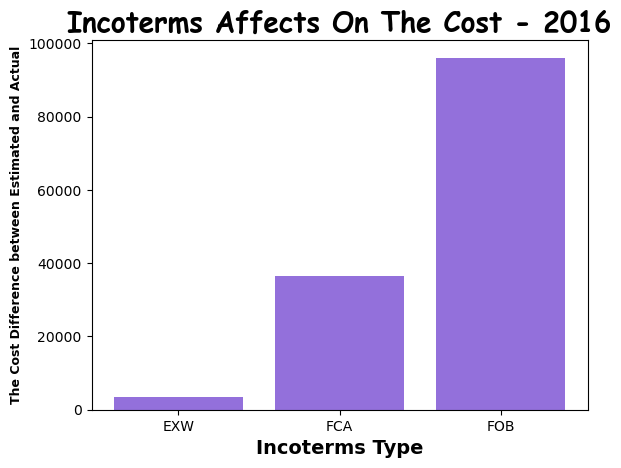

In [405]:
# Create barplot - 2016

result = shipments_2016.groupby('incoterms').sum()
result
types = [types for types, df in shipments_2016.groupby('incoterms')]

plt.style.use('default')
plt.bar(types, result['difference'],color = 'mediumpurple')



plt.xticks(types)
plt.xlabel('Incoterms Type',fontdict = {'fontweight':'bold','fontsize':14})
plt.ylabel('The Cost Difference between Estimated and Actual',fontdict = {'fontweight':'bold','fontsize':9})
plt.title('Incoterms Affects On The Cost - 2016', fontdict = {'fontweight':'bold','fontsize': 20,'fontname': 'Comic Sans MS'})



plt.show()

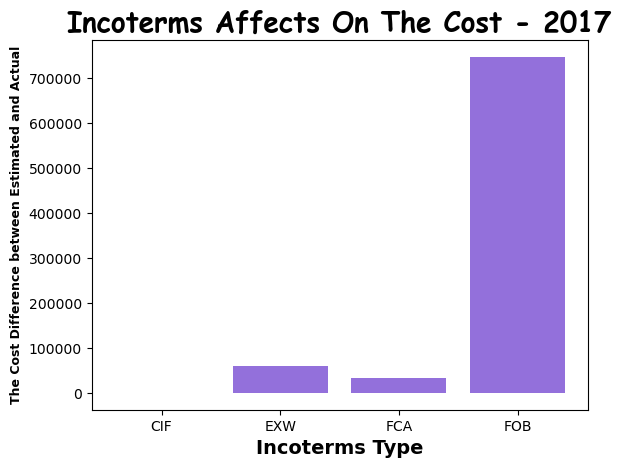

In [407]:
# Create barplot - 2017
result = shipments_2017.groupby('incoterms').sum()
result
types = [types for types, df in shipments_2017.groupby('incoterms')]

plt.style.use('default')
plt.bar(types, result['difference'],color = 'mediumpurple')


plt.xticks(types)
plt.xlabel('Incoterms Type',fontdict = {'fontweight':'bold','fontsize':14})
plt.ylabel('The Cost Difference between Estimated and Actual',fontdict = {'fontweight':'bold','fontsize':9})
plt.title('Incoterms Affects On The Cost - 2017', fontdict = {'fontweight':'bold','fontsize': 20,'fontname': 'Comic Sans MS'})



plt.show()

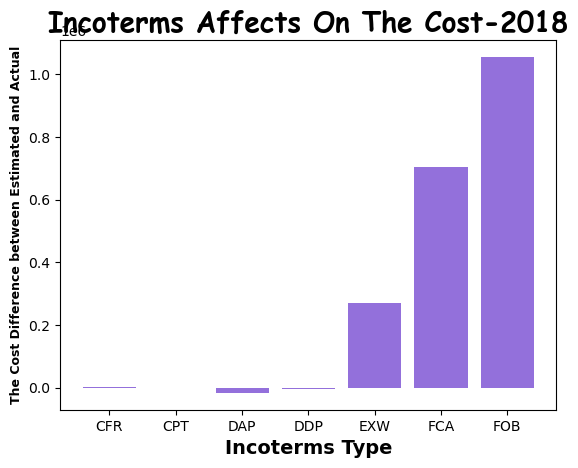

In [408]:
# Data Visualiztion on year 2018
result = shipments_2018.groupby('incoterms').sum()
result
types = [types for types, df in shipments_2018.groupby('incoterms')]

plt.style.use('default')
plt.bar(types, result['difference'],color = 'mediumpurple')


plt.xticks(types)
plt.xlabel('Incoterms Type',fontdict = {'fontweight':'bold','fontsize':14})
plt.ylabel('The Cost Difference between Estimated and Actual',fontdict = {'fontweight':'bold','fontsize':9})
plt.title('Incoterms Affects On The Cost-2018', fontdict = {'fontweight':'bold','fontsize': 20,'fontname': 'Comic Sans MS'})



plt.show()

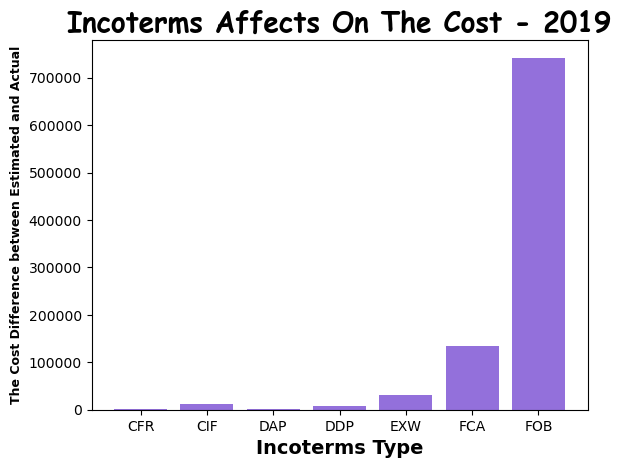

In [410]:
# Data Visualiztion on year 2019
result = shipments_2019.groupby('incoterms').sum()
result
types = [types for types, df in shipments_2019.groupby('incoterms')]

plt.style.use('default')
plt.bar(types, result['difference'],color = 'mediumpurple')


plt.xticks(types)
plt.xlabel('Incoterms Type',fontdict = {'fontweight':'bold','fontsize':14})
plt.ylabel('The Cost Difference between Estimated and Actual',fontdict = {'fontweight':'bold','fontsize':9})
plt.title('Incoterms Affects On The Cost - 2019', fontdict = {'fontweight':'bold','fontsize': 20,'fontname': 'Comic Sans MS'})



plt.show()

#### The higher the difference which means the lower the actual cost compare to the estimated cost. FOB has the lowest actual cost for the firm, EXW has the highest actual cost. 

# Then, I want to analyze on the delivery to see whether it's on-time or not 

In [411]:
# Create New Column
shipments['estimate_delivery'] = shipments['scheduled_delivery_date'].str[0:13]
shipments['actual_delivery'] = shipments['actual_delivery_date'].str[0:13]
shipments.head()

,shipment_id,shipment_created_in_system_date,mode,bco,freight_service,freight_type,incoterms,contains_dangerous_goods,supplier_company_id,consignee_company_id,...,includes_customs,target_net_revenue,estimated_total_cost,actual_total_cost,actual_total_invoice,estimated_cost_error,Year,Month,estimate_delivery,actual_delivery
2,384675,2018-08-15,Ocean FCL,f,CY to CY,Port to Port,FOB,f,633728,546609,...,f,221.96,2219.65,2194.59,2304.82,1.011419,2018,11,2018-11-10 20,2018-11-05 08
3,310117,2018-06-13,Air,f,CFS to CFS,Door to Door,EXW,f,636800,543943,...,t,1147.65,11601.98,10324.84,11601.98,1.123696,2018,06,2018-06-18 07,2018-06-18 22
6,312662,2018-06-15,Ocean FCL,f,CY to CY,Port to Port,FOB,f,749699,612365,...,f,167.95,3359.02,3406.36,3476.86,0.986102,2018,08,2018-08-22 16,2018-08-22 04
7,416056,2018-09-17,Air,f,CFS to CFS,Port to Door,FCA,f,680817,654884,...,t,520.75,10651.50,9322.91,11366.10,1.142508,2018,09,2018-09-28 19,2018-09-28 22
8,297747,2018-06-01,Ocean FCL,f,CY to Door,Port to Door,FOB,f,598234,543943,...,t,270.99,2835.92,2272.82,2835.91,1.247754,2018,07,2018-07-06 07,2018-07-06 19


In [412]:
# Change Data Type
shipments['estimate_delivery'] = pd.to_datetime(shipments['estimate_delivery'])
shipments['actual_delivery'] = pd.to_datetime(shipments['actual_delivery'] )
shipments['date_difference'] =  shipments['estimate_delivery'] - shipments['actual_delivery']
shipments.head()

,shipment_id,shipment_created_in_system_date,mode,bco,freight_service,freight_type,incoterms,contains_dangerous_goods,supplier_company_id,consignee_company_id,...,target_net_revenue,estimated_total_cost,actual_total_cost,actual_total_invoice,estimated_cost_error,Year,Month,estimate_delivery,actual_delivery,date_difference
2,384675,2018-08-15,Ocean FCL,f,CY to CY,Port to Port,FOB,f,633728,546609,...,221.96,2219.65,2194.59,2304.82,1.011419,2018,11,2018-11-10 20:00:00,2018-11-05 08:00:00,5 days 12:00:00
3,310117,2018-06-13,Air,f,CFS to CFS,Door to Door,EXW,f,636800,543943,...,1147.65,11601.98,10324.84,11601.98,1.123696,2018,06,2018-06-18 07:00:00,2018-06-18 22:00:00,-1 days +09:00:00
6,312662,2018-06-15,Ocean FCL,f,CY to CY,Port to Port,FOB,f,749699,612365,...,167.95,3359.02,3406.36,3476.86,0.986102,2018,08,2018-08-22 16:00:00,2018-08-22 04:00:00,0 days 12:00:00
7,416056,2018-09-17,Air,f,CFS to CFS,Port to Door,FCA,f,680817,654884,...,520.75,10651.50,9322.91,11366.10,1.142508,2018,09,2018-09-28 19:00:00,2018-09-28 22:00:00,-1 days +21:00:00
8,297747,2018-06-01,Ocean FCL,f,CY to Door,Port to Door,FOB,f,598234,543943,...,270.99,2835.92,2272.82,2835.91,1.247754,2018,07,2018-07-06 07:00:00,2018-07-06 19:00:00,-1 days +12:00:00


In [413]:
# Cal the mean
shipments.mean()['date_difference']

<ipython-input-413-da3d0f9f4dc1>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  shipments.mean()['date_difference']


Timedelta('0 days 12:21:46.834313526')

### In gerneral, The Flexport delivery is pretty fast and on-time as always. During the 2016 to 2019, the average delivery time between estimation and actual time is actual delivery time is 12 hour 21 mins less than estimated time.

# Question: What are major factors to influence the delivery time ?

In [414]:
# Shipment delay 
df = shipments.loc[shipments['date_difference'] > '1 days'] 

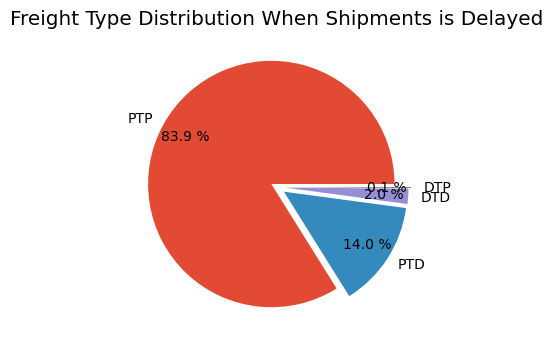

In [415]:
df['freight_type'].value_counts(normalize = True)

# Create Pie Chart
PTP = 0.84
PTD = 0.14
DTD = 0.02
DTP = 0.0013

plt.figure(figsize=(6,4))

plt.style.use('ggplot')
labels = ['PTP', 'PTD','DTD','DTP']
explode = [0.05,0.07,0.07,0.09]
plt.title('Freight Type Distribution When Shipments is Delayed')

plt.pie([PTP, PTD,DTD,DTP],labels = labels,autopct = '%.1f %%',pctdistance = 0.8,explode = explode)


plt.show()


In [416]:
df1 = shipments.loc[shipments['date_difference'] < '1 days'] 

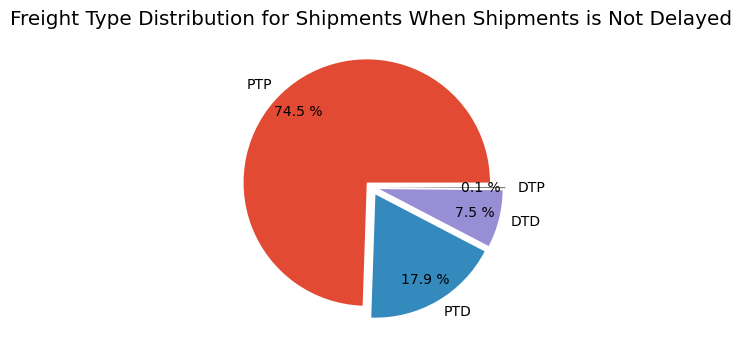

In [417]:
df1['freight_type'].value_counts(normalize = True)

# Create Pie Chart
PTP = 0.745
PTD = 0.179
DTD = 0.075
DTP = 0.0015

plt.figure(figsize=(6,4))

plt.style.use('ggplot')
labels = ['PTP', 'PTD','DTD','DTP']
explode = [0.05,0.07,0.07,0.09]
plt.title('Freight Type Distribution for Shipments When Shipments is Not Delayed')


plt.pie([PTP, PTD,DTD,DTP],labels = labels,autopct = '%.1f %%',pctdistance = 0.8,explode = explode)


plt.show()

<ipython-input-418-4f2d48b0ea5f>:15: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie([false, true],labels = labels,autopct = '%.1f %%',pctdistance = 0.8,explode = explode)


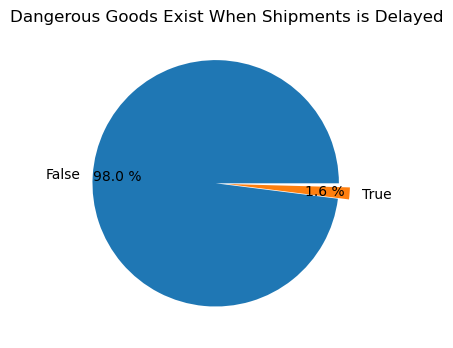

In [418]:
df['contains_dangerous_goods'].value_counts(normalize = True)

# Create Pie Chart
false = 0.98
true = 0.0156

plt.figure(figsize=(6,4))

plt.style.use('default')
labels = ['False','True']
explode = [0.09,0]
plt.title('Dangerous Goods Exist When Shipments is Delayed')


plt.pie([false, true],labels = labels,autopct = '%.1f %%',pctdistance = 0.8,explode = explode)


plt.show()

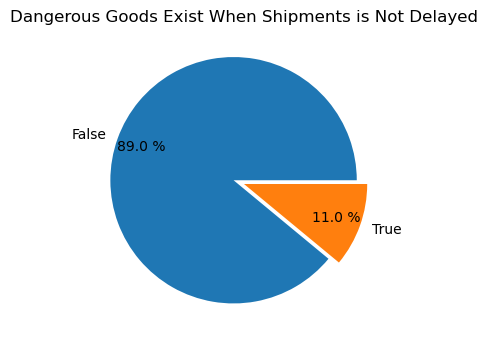

In [419]:
df1['contains_dangerous_goods'].value_counts(normalize = True)

# Create Pie Chart
false = 0.89
true = 0.11

plt.figure(figsize=(6,4))

plt.style.use('default')
labels = ['False','True']
explode = [0.09,0]
plt.title('Dangerous Goods Exist When Shipments is Not Delayed')


plt.pie([false, true],labels = labels,autopct = '%.1f %%',pctdistance = 0.8,explode = explode)


plt.show()

#### From the graph, we can see that there are two major factors that influenced the delivery time, which they are dangerous goods and freight type distribution for Shipments. 

# Machine Learning Model- Predict a good container 

In [7]:
# Make a copy on the dataset
containers1 = containers.copy()
containers1

,shipment_id,container_id,container_type,container_size,volume_cbm,weight_kg,container_utilization
0,551258,195846,Dry,40 ft HC,65.590000,9155.6200,0.8642
1,611620,228371,Dry,40 ft,34.800000,5774.0000,0.5179
2,569644,199211,Dry,40 ft,51.572000,6017.9200,0.7674
3,600001,229944,Dry,40 ft HC,63.828000,7270.6400,0.8409
4,561978,203206,Dry,40 ft HC,2345.249227,7319.3384,30.8992
...,...,...,...,...,...,...,...
5395,131238,45764,Dry,40 ft HC,59.532000,9207.6000,0.7843
5396,573653,206394,Dry,40 ft,24.260000,4136.6000,0.3610
5397,563186,202014,Dry,40 ft HC,65.033000,7049.5300,0.8568
5398,262937,71779,Dry,45 ft HC,74.257000,11239.5500,0.8625


In [8]:
# Select necessary columns 
containers1 = containers1.loc[:,['container_type','container_size','volume_cbm','weight_kg','container_utilization']]
containers1.head()

,container_type,container_size,volume_cbm,weight_kg,container_utilization
0,Dry,40 ft HC,65.590000,9155.6200,0.8642
1,Dry,40 ft,34.800000,5774.0000,0.5179
2,Dry,40 ft,51.572000,6017.9200,0.7674
3,Dry,40 ft HC,63.828000,7270.6400,0.8409
4,Dry,40 ft HC,2345.249227,7319.3384,30.8992


In [9]:
# Check missing values 
containers1.isna().sum()

# Check container types 
containers1['container_type'].value_counts(normalize = True)

Dry           0.994991
Ventilated    0.004638
Flat Rack     0.000186
Open          0.000186
Name: container_type, dtype: float64

### Assumption: There are 10 missing values in the container type variable, but over 99% of container's type is dry so I will fill out the missing value by using the dry as my container type. 

In [10]:
# fill NA with frequence value
containers1.fillna(value = 'Dry',inplace=True)
containers1.isna().sum()

container_type           0
container_size           0
volume_cbm               0
weight_kg                0
container_utilization    0
dtype: int64

### In order to train the model, I need to create the label. I decided to create label according to its container utilization rate, I think if the container utilization rate is above 80%, then it's a good container. I assigned 1 to these records, 0 to else. 

In [11]:
# Create the label 
containers1['container_utilization'] = containers1['container_utilization'].apply(lambda x: 1 if x >= 0.8 else 0)
containers1.head()

,container_type,container_size,volume_cbm,weight_kg,container_utilization
0,Dry,40 ft HC,65.590000,9155.6200,1
1,Dry,40 ft,34.800000,5774.0000,0
2,Dry,40 ft,51.572000,6017.9200,0
3,Dry,40 ft HC,63.828000,7270.6400,1
4,Dry,40 ft HC,2345.249227,7319.3384,1


#### Building the pipeline

In [23]:
# Separate the dataset into a features matrix X and a target array y
x = containers1.drop('container_utilization', axis='columns')
y = containers1.container_utilization

In [24]:
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

In [25]:
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, ['volume_cbm', 'weight_kg']),
    ('cat', OneHotEncoder(), ['container_type', 'container_size'])
])

In [26]:
df_X_tr = full_pipeline.fit_transform(x)

In [27]:
pd.DataFrame(df_X_tr).head()

,0,1,2,3,4,5,6,7,8,9
0,0.051824,0.314999,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.085691,-0.276919,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.010783,-0.234223,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.043955,-0.014947,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,10.233334,-0.006423,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
### Build the model
log_reg = LogisticRegression(random_state=0)

In [29]:
# Cross Validation 
scores = cross_val_score(log_reg,df_X_tr, y, scoring='accuracy', cv=10)
scores.mean()

0.8322222222222221

In [30]:
log_reg.fit(df_X_tr, y)

LogisticRegression(random_state=0)

In [333]:
# Predict using the model
sample_df = containers1[:5386]

In [334]:
sample_df_X = sample_df.drop('container_utilization', axis='columns')

In [335]:
sample_df_X_tr = full_pipeline.transform(sample_df_X)

In [336]:
predicted = log_reg.predict(sample_df_X_tr)
predicted

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [743]:
actual = sample_df['container_utilization'][0:5386]

#### Confusion Matrix

In [744]:
confusion_matrix(actual, predicted)

array([[3036,  106],
       [  31, 2213]], dtype=int64)

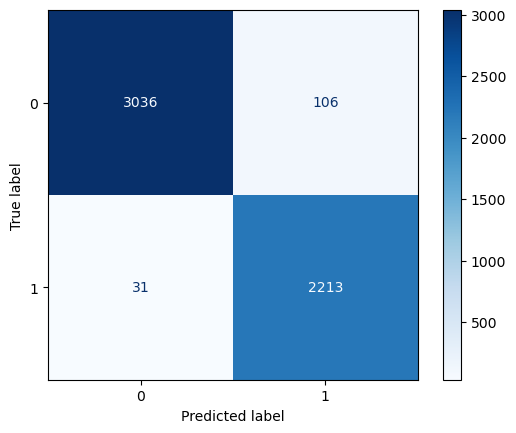

In [670]:
plot_confusion_matrix(log_reg, sample_df_X_tr, actual, cmap=plt.cm.Blues)

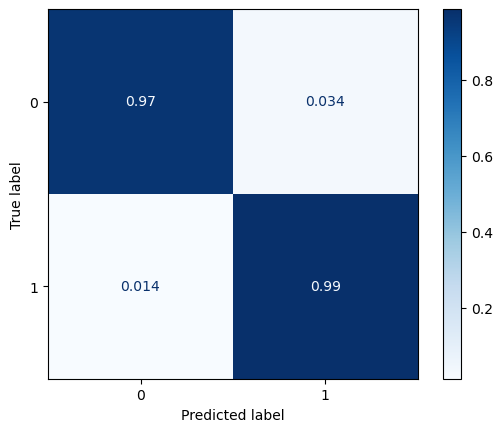

In [671]:
plot_confusion_matrix(log_reg, sample_df_X_tr, actual, cmap=plt.cm.Blues, normalize='true')

#### Is there a correlation between container utilization and other variables?

In [672]:
corr_matrix = containers1.corr()

In [673]:
corr_matrix['container_utilization'].sort_values(ascending=False)

container_utilization    1.000000
volume_cbm               0.671758
weight_kg                0.150374
Name: container_utilization, dtype: float64

# The end of the analytical report 